In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import layers
from keras import models
from PIL import Image

C:\Users\TECHNO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [98]:
## Load dataset

In [56]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [31]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

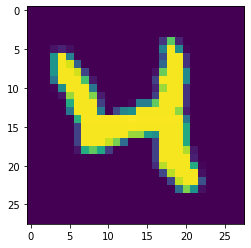

In [32]:
plt.imshow(X_train[20])

In [33]:
X_train = X_train.reshape((60000, 28, 28,1))
X_train = X_train.astype('float') / 256  # Normalize data

X_test = X_test.reshape((10000, 28, 28,1))
X_test = X_test.astype('float') / 256  # Normalize data

In [34]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [29]:
## Create model

In [30]:
## model
model = models.Sequential()

## Feature Extraction (CNN)
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))

## fully connected
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = 'accuracy')

In [33]:
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
938/938 [==============================] - 21s 21ms/step - loss: 0.1939 - accuracy: 0.9434
Epoch 2/10
938/938 [==============================] - 20s 21ms/step - loss: 0.0585 - accuracy: 0.9824
Epoch 3/10
938/938 [==============================] - 20s 21ms/step - loss: 0.0416 - accuracy: 0.9870
Epoch 4/10
938/938 [==============================] - 20s 22ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 5/10
938/938 [==============================] - 20s 21ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 6/10
938/938 [==============================] - 20s 22ms/step - loss: 0.0213 - accuracy: 0.9930
Epoch 7/10
938/938 [==============================] - 20s 21ms/step - loss: 0.0176 - accuracy: 0.9943
Epoch 8/10
938/938 [==============================] - 20s 22ms/step - loss: 0.0144 - accuracy: 0.9953
Epoch 9/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 10/10
938/938 [==============================] - 20s 22ms/step - loss: 0.010

In [34]:
predict = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [35]:
predict = np.argmax(np.round(predict),axis=1)
predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [36]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0286 - accuracy: 0.9917


[0.028645148500800133, 0.9916999936103821]

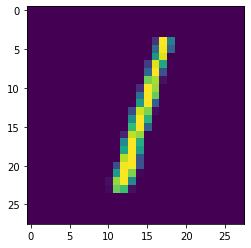

In [35]:
plt.imshow(X_test[2])

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [40]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [42]:
import seaborn as sns

In [45]:
# plt.figure(figsize=(20,10))
# sns.heatmap(confusion_matrix(y_test,predict),annot=True)
confusion_matrix(y_test,predict)

array([[ 974,    1,    0,    0,    0,    1,    2,    1,    1,    0],
       [   1, 1131,    1,    0,    0,    0,    2,    0,    0,    0],
       [   2,    0, 1022,    0,    1,    0,    0,    4,    3,    0],
       [   0,    0,    2, 1005,    0,    3,    0,    0,    0,    0],
       [   0,    1,    1,    0,  978,    0,    2,    0,    0,    0],
       [   2,    0,    0,    6,    0,  880,    2,    0,    1,    1],
       [   1,    2,    0,    0,    2,    1,  951,    0,    1,    0],
       [   1,    1,    3,    1,    0,    0,    0, 1019,    1,    2],
       [   1,    0,    3,    2,    0,    0,    2,    1,  962,    3],
       [   3,    0,    0,    0,    7,    3,    0,    1,    1,  994]],
      dtype=int64)

In [60]:
len(X_train[0])

28